# 서울시 자치구 별 CCTV

In [2]:
import pandas as pd
import time 
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import numpy as np

### 서울 열린데이터 광장에 있는 CCTV 현황 엑셀 다운받기

In [5]:
driver = webdriver.Chrome('../05.Crawling/chromedriver')
driver.maximize_window()
driver.get('https://data.seoul.go.kr')
time.sleep(1)
driver.find_element_by_css_selector('#searchKeyword').send_keys('CCTV')
time.sleep(2)
driver.find_element_by_xpath('//*[@id="datasetVO"]/div/div[1]/button').click()
time.sleep(1)
driver.find_element_by_xpath('//*[@id="datasetVO"]/div[2]/div/section/div[2]/dl[1]/dt/a').click()
time.sleep(1)
driver.find_element_by_xpath('//*[@id="fileTr_1"]/td[6]/a').click()
time.sleep(2)

### 서울시 서울통계 사이트를 통해 서울인구 알아보기

In [9]:
driver = webdriver.Chrome('../05.Crawling/chromedriver')
driver.maximize_window()
driver.get('https://data.seoul.go.kr')
time.sleep(1)
driver.find_element_by_xpath('//*[@id="baseBody"]/div[1]/div/div[2]/div[1]/a[11]').click()
time.sleep(1)
driver.find_element_by_xpath('//*[@id="datasetVO"]/div[2]/div/section/div[2]/dl[1]/dt/a').click()
time.sleep(1)
driver.find_element_by_css_selector('#btnCsv').click()

In [10]:
driver.quit()

### 가져온 데이터 읽기

In [90]:
cctv_Seoul = pd.read_excel('./data/서울시 자치구 년도별 CCTV 설치 현황(2011년 이전_2018년).xlsx')
cctv_Seoul.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671


In [95]:
cctv_Seoul.rename(columns={cctv_Seoul.columns[0] : '구별'}, inplace=True)
cctv_Seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2015년 이전
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448,3431.0
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385,1027.0
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319,691.0
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254,909.0
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671,2001.0


In [66]:
pop_Seoul = pd.read_csv('./data/report.txt', delimiter = '\t',header=2)[['자치구','계','계.1','계.2','65세이상고령자']]
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,"9,953,009","9,699,232","253,777","1,552,356"
1,종로구,"159,842","149,952","9,890","28,396"
2,중구,"135,321","125,800","9,521","24,265"
3,용산구,"244,953","229,786","15,167","39,995"
4,성동구,"302,695","295,591","7,104","45,372"


In [67]:
pop_Seoul.rename(columns={pop_Seoul.columns[0] :'구별',
                        pop_Seoul.columns[1] : '인구수',
                        pop_Seoul.columns[2] : '한국인',
                        pop_Seoul.columns[3] : '외국인',
                        pop_Seoul.columns[4] : '고령자'}, inplace=True)
pop_Seoul

,구별,인구수,한국인,외국인,고령자
0,합계,"9,953,009","9,699,232","253,777","1,552,356"
1,종로구,"159,842","149,952","9,890","28,396"
2,중구,"135,321","125,800","9,521","24,265"
3,용산구,"244,953","229,786","15,167","39,995"
4,성동구,"302,695","295,591","7,104","45,372"
5,광진구,"361,923","348,064","13,859","50,047"
6,동대문구,"358,679","344,416","14,263","61,408"
7,중랑구,"400,989","395,997","4,992","68,658"
8,성북구,"449,871","439,719","10,152","73,370"
9,강북구,"313,550","309,996","3,554","62,951"


### CCTV 와 인구 현황 데이터 파악하기

In [96]:
cctv_Seoul.sort_values(by= '소계', ascending=True).head(5)

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2015년 이전
9,도 봉 구,858,197.0,66.0,8.0,185,59,155,117,71,515.0
24,중 랑 구,1068,NaN,NaN,NaN,770,102,121,66,9,NaN
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319,691.0
22,종 로 구,1471,8.0,7.0,599.0,132,195,148,281,101,941.0
23,중 구,1544,25.0,165.0,114.0,80,245,270,317,328,629.0


In [97]:
cctv_Seoul.sort_values(by= '소계', ascending=False).head(5)

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2015년 이전
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448,3431.0
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671,2001.0
6,구 로 구,3227,852.0,219.0,349.0,187,268,326,540,486,1875.0
16,성 북 구,3003,779.0,84.0,304.0,241,279,388,285,643,1687.0
21,은 평 구,2962,1365.0,83.0,99.0,343,180,296,229,367,2070.0


In [93]:
# 책이랑 맞추기 위해서 최근 3년과 그 이전으로 나눔
cctv_Seoul['2015년 이전'] = cctv_Seoul['2015년']+cctv_Seoul['2014년']+cctv_Seoul['2013년']+cctv_Seoul['2012년']+cctv_Seoul['2011년 이전']

In [98]:
cctv_Seoul = cctv_Seoul[['구별','소계','2015년 이전','2016년','2017년','2018년']]

In [99]:
# 최근 증가율
cctv_Seoul['최근증가율'] = (
    cctv_Seoul['2018년']
    +cctv_Seoul['2017년']
    +cctv_Seoul['2016년']
    )/cctv_Seoul['2015년 이전'] * 100
cctv_Seoul.sort_values(by='최근증가율', ascending=False).head(5)

,구별,소계,2015년 이전,2016년,2017년,2018년,최근증가율
23,중 구,1544,629.0,270,317,328,145.468998
19,영등포구,2495,1042.0,289,371,793,139.443378
15,성 동 구,2679,1251.0,201,933,294,114.148681
7,금 천 구,1634,769.0,136,199,530,112.483745
5,광 진 구,1581,746.0,21,468,346,111.930295


In [68]:
pop_Seoul.drop([0], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,"159,842","149,952","9,890","28,396"
2,중구,"135,321","125,800","9,521","24,265"
3,용산구,"244,953","229,786","15,167","39,995"
4,성동구,"302,695","295,591","7,104","45,372"
5,광진구,"361,923","348,064","13,859","50,047"


In [56]:
pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [57]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인']/pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자']/pop_Seoul['인구수'] * 100
pop_Seoul.head()

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [69]:
# 문자열 정수로 변경하기
pop_Seoul['인구수'] = pop_Seoul['인구수'].str.replace(',', '').astype('int64')
pop_Seoul['한국인'] = pop_Seoul['한국인'].str.replace(',', '').astype('int64')
pop_Seoul['외국인'] = pop_Seoul['외국인'].str.replace(',', '').astype('int64')
pop_Seoul['고령자'] = pop_Seoul['고령자'].str.replace(',', '').astype('int64')

In [70]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인']/pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자']/pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,159842,149952,9890,28396,6.187360,17.765043
2,중구,135321,125800,9521,24265,7.035863,17.931437
3,용산구,244953,229786,15167,39995,6.191800,16.327622
4,성동구,302695,295591,7104,45372,2.346917,14.989346
5,광진구,361923,348064,13859,50047,3.829268,13.828079


In [71]:
pop_Seoul.sort_values(by='인구수',ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,676673,670331,6342,92149,0.937233,13.617951
16,강서구,589536,583544,5992,88052,1.016393,14.935814
23,강남구,544085,539235,4850,73942,0.891405,13.590156
11,노원구,529532,525486,4046,84612,0.764071,15.978638
21,관악구,514555,498574,15981,78206,3.105790,15.198764


In [74]:
pop_Seoul.sort_values(by='외국인',ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,405982,375630,30352,60826,7.476194,14.982438
17,구로구,435751,405579,30172,69312,6.924138,15.906332
18,금천구,249641,232157,17484,39361,7.003657,15.767041
21,관악구,514555,498574,15981,78206,3.105790,15.198764
3,용산구,244953,229786,15167,39995,6.191800,16.327622


In [76]:
pop_Seoul.sort_values(by='외국인비율',ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,405982,375630,30352,60826,7.476194,14.982438
2,중구,135321,125800,9521,24265,7.035863,17.931437
18,금천구,249641,232157,17484,39361,7.003657,15.767041
17,구로구,435751,405579,30172,69312,6.924138,15.906332
3,용산구,244953,229786,15167,39995,6.191800,16.327622


In [78]:
pop_Seoul.sort_values(by='고령자',ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,676673,670331,6342,92149,0.937233,13.617951
16,강서구,589536,583544,5992,88052,1.016393,14.935814
11,노원구,529532,525486,4046,84612,0.764071,15.978638
12,은평구,485842,481546,4296,84353,0.884238,17.362229
21,관악구,514555,498574,15981,78206,3.105790,15.198764


In [79]:
pop_Seoul.sort_values(by='고령자비율',ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,313550,309996,3554,62951,1.133472,20.076862
10,도봉구,329300,327248,2052,61388,0.623140,18.641968
2,중구,135321,125800,9521,24265,7.035863,17.931437
1,종로구,159842,149952,9890,28396,6.187360,17.765043
12,은평구,485842,481546,4296,84353,0.884238,17.362229


### CCTV 데이터와 인구 현황 데이터를 합치고 분석하기

In [116]:
# 구별 데이터에 ' '가 있어서 오류
cctv_Seoul['구별'] = cctv_Seoul['구별'].str.replace(' ', '')

In [117]:
pop_Seoul.sort_values(by='구별',inplace=True)
pop_Seoul.reset_index(drop=True,inplace=True)

In [124]:
data_result = pd.merge(cctv_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,2015년 이전,2016년,2017년,2018년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,3431.0,765,577,448,52.171379,544085,539235,4850,73942,0.891405,13.590156
1,강동구,1879,1027.0,194,273,385,82.960078,462275,458058,4217,68798,0.912228,14.882483
2,강북구,1265,691.0,254,1,319,83.068017,313550,309996,3554,62951,1.133472,20.076862
3,강서구,1617,909.0,190,264,254,77.887789,589536,583544,5992,88052,1.016393,14.935814
4,관악구,3985,2001.0,619,694,671,99.150425,514555,498574,15981,78206,3.105790,15.198764


In [125]:
del data_result['2015년 이전']
del data_result['2016년']
del data_result['2017년']
del data_result['2018년']
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,52.171379,544085,539235,4850,73942,0.891405,13.590156
1,강동구,1879,82.960078,462275,458058,4217,68798,0.912228,14.882483
2,강북구,1265,83.068017,313550,309996,3554,62951,1.133472,20.076862
3,강서구,1617,77.887789,589536,583544,5992,88052,1.016393,14.935814
4,관악구,3985,99.150425,514555,498574,15981,78206,3.105790,15.198764


In [126]:
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,5221,52.171379,544085,539235,4850,73942,0.891405,13.590156
강동구,1879,82.960078,462275,458058,4217,68798,0.912228,14.882483
강북구,1265,83.068017,313550,309996,3554,62951,1.133472,20.076862
강서구,1617,77.887789,589536,583544,5992,88052,1.016393,14.935814
관악구,3985,99.150425,514555,498574,15981,78206,3.105790,15.198764


In [127]:
# 상관계수
np.corrcoef(data_result['고령자비율'],data_result['소계'])

array([[ 1.        , -0.45361392],
       [-0.45361392,  1.        ]])

In [130]:
np.corrcoef(data_result['외국인비율'],data_result['소계'])

array([[ 1.        , -0.06150919],
       [-0.06150919,  1.        ]])

In [131]:
np.corrcoef(data_result['인구수'],data_result['소계'])

array([[1.        , 0.38021221],
       [0.38021221, 1.        ]])

In [132]:
data_result.sort_values(by='소계', ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,5221,52.171379,544085,539235,4850,73942,0.891405,13.590156
관악구,3985,99.150425,514555,498574,15981,78206,3.105790,15.198764
구로구,3227,72.106667,435751,405579,30172,69312,6.924138,15.906332
성북구,3003,78.008299,449871,439719,10152,73370,2.256647,16.309120
은평구,2962,43.091787,485842,481546,4296,84353,0.884238,17.362229


In [133]:
data_result.sort_values(by='인구수', ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,1586,62.833676,676673,670331,6342,92149,0.937233,13.617951
강서구,1617,77.887789,589536,583544,5992,88052,1.016393,14.935814
강남구,5221,52.171379,544085,539235,4850,73942,0.891405,13.590156
노원구,1906,42.026826,529532,525486,4046,84612,0.764071,15.978638
관악구,3985,99.150425,514555,498574,15981,78206,3.105790,15.198764


### CCTV 현황 그래프로 분석하기

In [135]:
import seaborn as sns 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

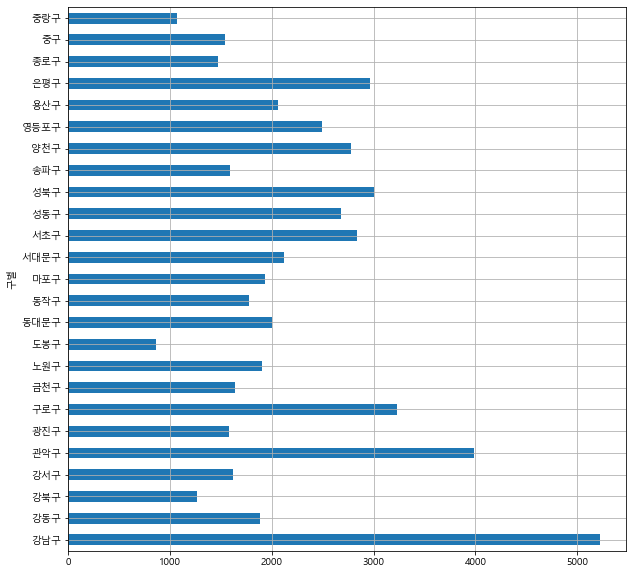

In [136]:
data_result['소계'].plot(kind='barh', grid= True, figsize=(10,10))
plt.show()

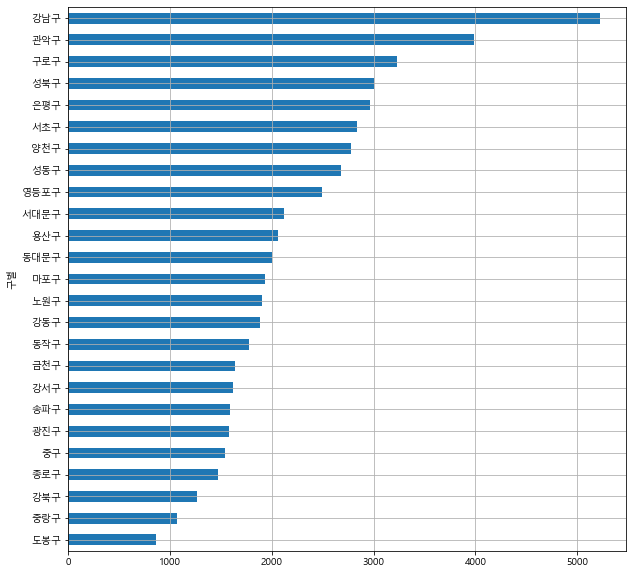

In [137]:
data_result['소계'].sort_values().plot(kind='barh', grid= True, figsize=(10,10))
plt.show()

In [138]:
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100

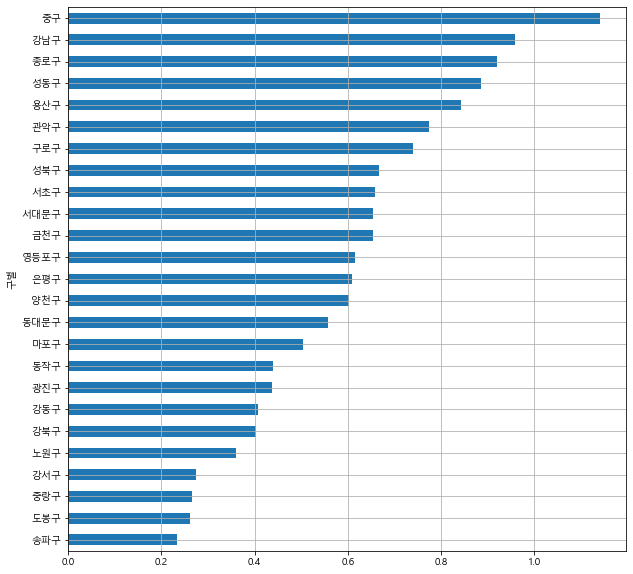

In [140]:
data_result['CCTV비율'].sort_values().plot(kind='barh', grid= True, figsize=(10,10))
plt.show()

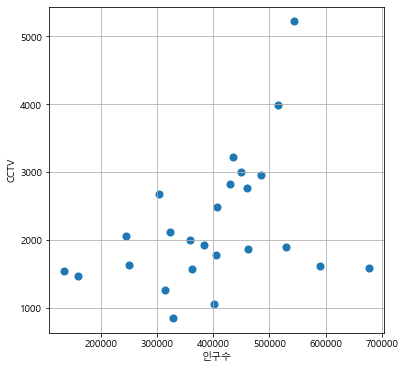

In [141]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [142]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([2.89293854e-03, 1.06798227e+03])

In [143]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

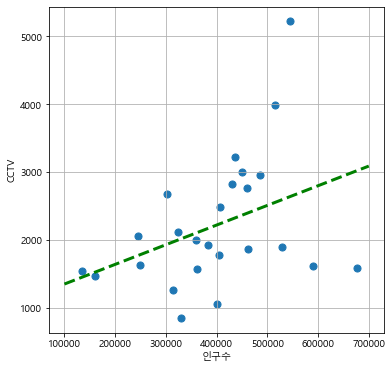

In [154]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [146]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,5221,52.171379,544085,539235,4850,73942,0.891405,13.590156,0.959593,2579.013268
송파구,1586,62.833676,676673,670331,6342,92149,0.937233,13.617951,0.234382,1439.555667
관악구,3985,99.150425,514555,498574,15981,78206,3.105790,15.198764,0.774456,1428.441743
도봉구,858,66.601942,329300,327248,2052,61388,0.623140,18.641968,0.260553,1162.626928
중랑구,1068,NaN,400989,395997,4992,68658,1.244922,17.122165,0.266341,1160.018799


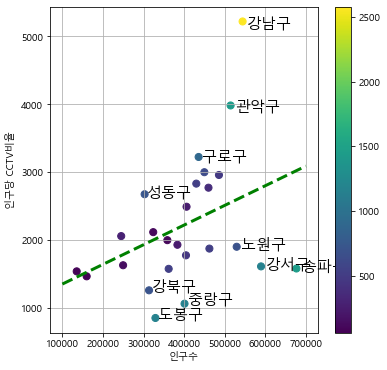

In [156]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'],c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98, df_sort.index[n] , fontsize=15)

plt.xlabel('인구수')
plt.ylabel('인구당 CCTV비율')

plt.colorbar()
plt.grid()
plt.show()